# Import libraries

In [93]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt
import category_encoders as ce                              # Encode data.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            RocCurveDisplay, \
                            PrecisionRecallDisplay, \
                            ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import imblearn                                             # Deal with imbalanced data.
from imblearn.over_sampling import SMOTE                    # Perform oversampling.
from collections import Counter                             # Count objects in containers.
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Category Encoders {}'.format(ce.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))
print('- imbalanced-learn {}\n'.format(imblearn.__version__))

Libraries used in this project:
- Python 3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]
- NumPy 2.1.1
- pandas 2.2.3
- Matplotlib 3.9.2
- Category Encoders 2.8.0
- scikit-learn 1.6.1
- XGBoost 3.0.1
- imbalanced-learn 0.13.0



# Load and preview the data

In [94]:
#Classification_data = pd.read_csv('Data_cleaned_Analysis.csv')
Classification_data = pd.read_pickle('Data_Cleaned_2.pickle')

Classification_data.head(n = 100)



,PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,BROWSER_VERSION,BROWSER_NAME,CATEGORY_ERROR,YEAR,TIME_BIN,IS_WEEKEND,MONTH
0,1,1,Desktop,2023-10-29 09:47:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,True,10
1,1,1,Desktop,2023-10-29 09:54:00,Passing Parameter,116.0.0.0,Chrome,PassingParam,2023,Morning,True,10
2,3,1,Desktop,2023-10-29 22:19:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,night,True,10
3,3,1,Desktop,2023-10-30 00:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,night,False,10
4,1,1,Desktop,2023-10-30 08:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,Desktop,2023-11-08 09:14:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,False,11
96,5,1,Desktop,2023-11-08 10:55:00,Passing Parameter,115.0.0.0,Firefox,PassingParam,2023,Morning,False,11
97,5,1,Desktop,2023-11-08 11:06:00,Passing Parameter,119.0.0.0,Firefox,PassingParam,2023,Morning,False,11
98,4,1,Desktop,2023-11-08 11:39:00,Passing Parameter,119.0.0.0,Chrome,PassingParam,2023,Morning,False,11


In [95]:
df = Classification_data.copy()

In [167]:
#Check the shape of the data
df.shape

(671, 10)

In [168]:
#Check the data types
df.dtypes

PAGE_NO                      int64
TOTAL_ANNOTATION             int64
DEVICE_NAME         string[python]
BROWSER_VERSION             object
BROWSER_NAME                object
CATEGORY_ERROR              object
YEAR                         int32
TIME_BIN                    object
IS_WEEKEND                   int64
MONTH                        int32
dtype: object

# Study Feature

1) CREATED_DATE - The date and time when the issue occurred.

2) BROWSER_NAME - The name of the browser used (e.g., Chrome, Firefox).

3) BROWSER_VERSION - The version number of the browser (e.g., Chrome 119.0.0.0, Firefox 118.0.0.0).

4) CATEGORY_ERROR	The type/category of the error encountered- extract from PROCESS_STAGE features.

5) IS_WEEKEND	Indicates whether the issue occurred on a weekend (True or False).

6) TIME_BIN	The time of day grouped into categories (e.g., Morning, Night).

7) MONTH	The month when the issue occurred (numeric format: 1–12).

8) YEAR	The year when the issue occurred (e.g., 2023).

9) DEVICE_NAME	The type of device used (e.g., Desktop, Mobile).

10) PROCESS_STAGE	The current stage of the system or process where the error occurred.The Features is the detail error.

11) Features for Numeric only - PAGE_NO,TOTAL_ANNOTATION,YEAR,TIME_BIN(if we can change to one hot encoding),IS_WEEKEND(if we can change to one hot encoding),MONTH

22) Features for Category only - DEVICE_NAME,BROWSER_NAME,BROWSER_VERSION,CATEGORY_ERROR

# Objective

1) The dataset have multi-label issues,use label encoding to the category value.
2) Set Features and Target Features
3) Choose features CATEGORY_ERROR because this label have multiple lable and well suited to do classification.
4) Model Classification will be Logistic Regression,Random Forest, and SVC (RBF).
5) Build a model Classificatioon to Predict category of the CATEGORY_ERROR that will be happen
6) Train and Test
7) Evaluate The Model
8) Balance the dataset with SMOTE
9) Train and Test with SMOTE
10) Evaluate The Model with SMOTE
11) Compare evaluation each model
12) Plot Confusion Metrix
13) Plot ROC curve and Precision-recall curve
14) Plot Learning curve
15) Plot Feature Important
16) Plot SHAP (Shapley Additive Explanations)
17) For Learning Purposes

# PreProcessing Data

In [96]:
df = df.drop(columns=["CREATED_DATE","PROCESS_STAGE"])

In [97]:
#change IS_WEEKEND ke 0/1
df["IS_WEEKEND"] = df["IS_WEEKEND"].astype(int)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PAGE_NO           671 non-null    int64 
 1   TOTAL_ANNOTATION  671 non-null    int64 
 2   DEVICE_NAME       671 non-null    string
 3   BROWSER_VERSION   671 non-null    object
 4   BROWSER_NAME      671 non-null    object
 5   CATEGORY_ERROR    671 non-null    object
 6   YEAR              671 non-null    int32 
 7   TIME_BIN          671 non-null    object
 8   IS_WEEKEND        671 non-null    int64 
 9   MONTH             671 non-null    int32 
dtypes: int32(2), int64(3), object(4), string(1)
memory usage: 47.3+ KB


# Study Target Feature with Multi Class

In [99]:
print('Distribution of CATEGORY_ERROR Labels: ', Counter(df.CATEGORY_ERROR))

Distribution of CATEGORY_ERROR Labels:  Counter({'PassingParam': 571, 'DocEditor_ConnectionTimeout': 25, 'DocEditor_ReceiveError': 20, 'DocEditor_DbUpdateErrEntries': 17, 'Other': 17, 'DocEditor_connection_closed': 17, 'DocEditor_CommitErrDatabaseTransaction': 3, 'DocEditor_ProviderFailed': 1})


Text(0.5, 1.0, 'Distribution of CATEGORY_ERROR Labels(Multi Class)')

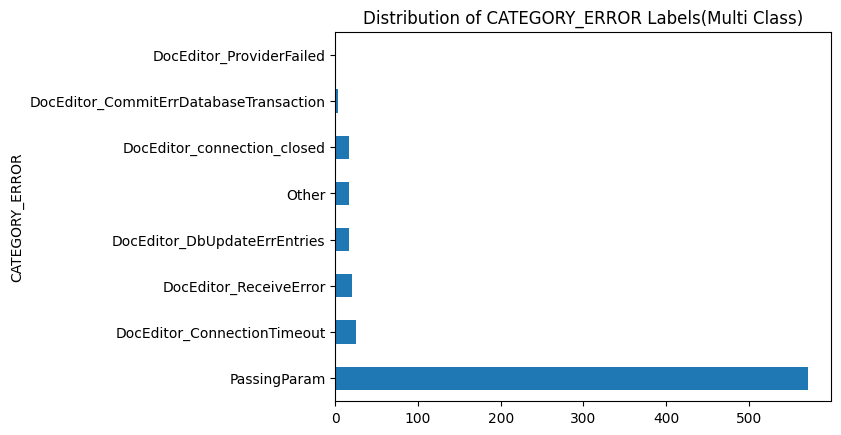

In [100]:
# Plot the distribution of CATEGORY_ERROR labels
df.CATEGORY_ERROR.value_counts().plot(kind = 'barh')
plt.title('Distribution of CATEGORY_ERROR Labels(Multi Class)')


# 1) Applying without SMOTE

# Multi-Class Classification 

In [101]:
features = ['PAGE_NO', 'TOTAL_ANNOTATION', 'DEVICE_NAME',
            'BROWSER_VERSION', 'BROWSER_NAME', 'YEAR', 'TIME_BIN', 'IS_WEEKEND', 'MONTH']
X = df[features]

In [102]:
#(one-hot encoding):
X_encoded = pd.get_dummies(X)

In [103]:
#Tukar label CATEGORY_ERROR kepada angka:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['CATEGORY_ERROR'])

# Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# RandomForestClassifier

In [105]:

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [106]:

y_pred = model.predict(X_test)

# Pastikan y_test adalah Series untuk gunakan .iloc
y_test_series = pd.Series(y_test, index=X_test.index)  # guna index yang sama

# Ambil 5 contoh dan gabungkan dengan ciri
results_RFClassifier = pd.concat([y_test_series.iloc[:5], X_test.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_RFClassifier.insert(1, 'CATEGORY_ERROR_PRED', y_pred[:5])

results_RFClassifier

,0,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,7,7,4,1,2023,0,12,True,False,False,...,False,False,True,False,False,False,False,True,False,False
158,7,7,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
480,7,6,1,2,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
641,4,7,1,1,2024,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
275,7,7,2,1,2023,1,11,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [107]:
# Jadikan y_test kepada Series dengan nama betul
y_test_series = pd.Series(y_test, index=X_test.index, name='CATEGORY_ERROR_TRUE')

# Gabungkan hasil sebenar dan ciri
results_RFClassifier = pd.concat([y_test_series.iloc[:5], X_test.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_RFClassifier.insert(1, 'CATEGORY_ERROR_PRED', y_pred[:5])

# (Opsyenal) Tukar nombor kelas kepada nama asal
results_RFClassifier['CATEGORY_ERROR_TRUE'] = le.inverse_transform(results_RFClassifier['CATEGORY_ERROR_TRUE'])
results_RFClassifier['CATEGORY_ERROR_PRED'] = le.inverse_transform(results_RFClassifier['CATEGORY_ERROR_PRED'])

results_RFClassifier

,CATEGORY_ERROR_TRUE,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,PassingParam,PassingParam,4,1,2023,0,12,True,False,False,...,False,False,True,False,False,False,False,True,False,False
158,PassingParam,PassingParam,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
480,PassingParam,Other,1,2,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
641,DocEditor_ReceiveError,PassingParam,1,1,2024,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
275,PassingParam,PassingParam,2,1,2023,1,11,True,False,False,...,False,False,True,False,False,False,False,False,False,True


# Evaluate (Random Forest)

Classification Report:
                                        precision    recall  f1-score  \
DocEditor_CommitErrDatabaseTransaction   0.000000  0.000000  0.000000   
DocEditor_ConnectionTimeout              0.333333  0.142857  0.200000   
DocEditor_DbUpdateErrEntries             0.000000  0.000000  0.000000   
DocEditor_ReceiveError                   0.000000  0.000000  0.000000   
DocEditor_connection_closed              0.000000  0.000000  0.000000   
Other                                    0.400000  0.666667  0.500000   
PassingParam                             0.931624  0.956140  0.943723   
accuracy                                 0.829630  0.829630  0.829630   
macro avg                                0.237851  0.252238  0.234818   
weighted avg                             0.812877  0.829630  0.818403   

                                          support  
DocEditor_CommitErrDatabaseTransaction    0.00000  
DocEditor_ConnectionTimeout               7.00000  
DocEditor_DbUpdat

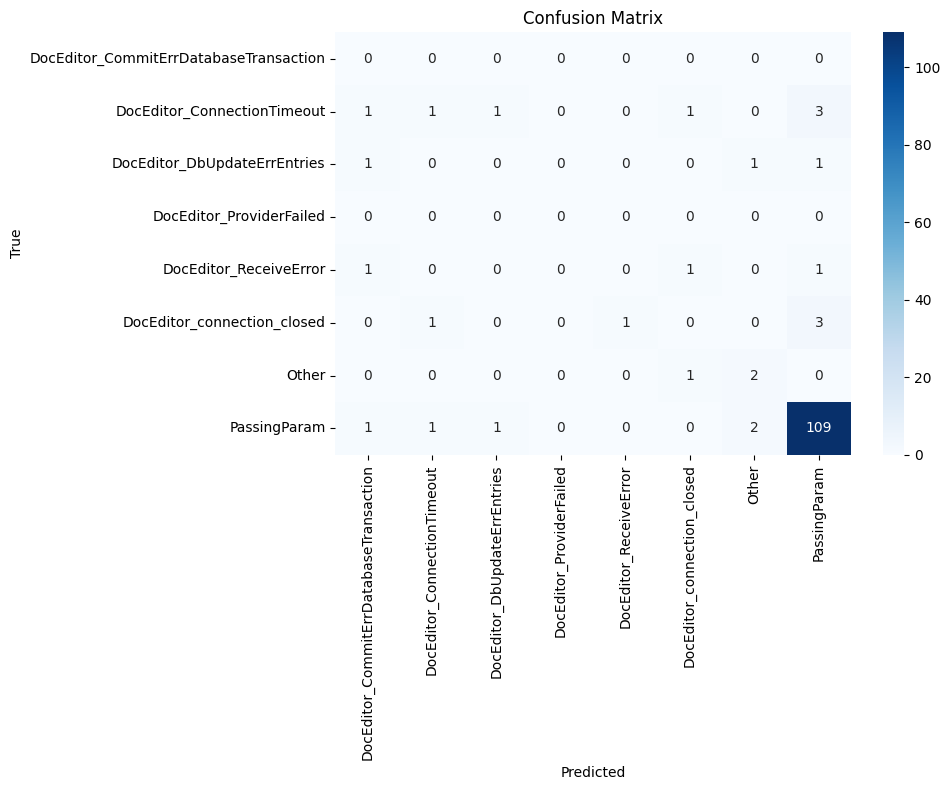


Overall Accuracy: 82.96%


In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Tukar label angka kepada nama asal
y_test_series = pd.Series(y_test, name='CATEGORY_ERROR_TRUE')
y_pred_series = pd.Series(y_pred, name='CATEGORY_ERROR_PRED')

y_test_labels = le.inverse_transform(y_test_series)
y_pred_labels = le.inverse_transform(y_pred_series)

# 1. Classification report
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 3. Accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"\nOverall Accuracy: {accuracy:.2%}")

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
logreg_multiclass = LogisticRegression(multi_class='multinomial', max_iter=1000)
logreg_multiclass.fit(X_train, y_train)
y_pred_logreg = logreg_multiclass.predict(X_test)

In [110]:

# Pastikan y_test adalah Series untuk gunakan .iloc
y_test_series_logreg_multiclass = pd.Series(y_test, index=X_test.index)  # guna index yang sama

# Ambil 5 contoh dan gabungkan dengan ciri
results_LogReg = pd.concat([y_test_series_logreg_multiclass.iloc[:5], X_test.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_LogReg.insert(1, 'CATEGORY_ERROR_PRED', y_pred_logreg[:5])

results_LogReg

,0,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,7,7,4,1,2023,0,12,True,False,False,...,False,False,True,False,False,False,False,True,False,False
158,7,7,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
480,7,2,1,2,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
641,4,7,1,1,2024,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
275,7,7,2,1,2023,1,11,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [111]:
# Jadikan y_test kepada Series dengan nama betul
y_test_series_logreg_multiclass = pd.Series(y_test, index=X_test.index, name='CATEGORY_ERROR_TRUE')

# Gabungkan hasil sebenar dan ciri
results_LogReg = pd.concat([y_test_series_logreg_multiclass.iloc[:5], X_test.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_LogReg.insert(1, 'CATEGORY_ERROR_PRED', y_pred_logreg[:5])

# (Opsyenal) Tukar nombor kelas kepada nama asal
results_LogReg['CATEGORY_ERROR_TRUE'] = le.inverse_transform(results_LogReg['CATEGORY_ERROR_TRUE'])
results_LogReg['CATEGORY_ERROR_PRED'] = le.inverse_transform(results_LogReg['CATEGORY_ERROR_PRED'])

results_LogReg

,CATEGORY_ERROR_TRUE,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,PassingParam,PassingParam,4,1,2023,0,12,True,False,False,...,False,False,True,False,False,False,False,True,False,False
158,PassingParam,PassingParam,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
480,PassingParam,DocEditor_DbUpdateErrEntries,1,2,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
641,DocEditor_ReceiveError,PassingParam,1,1,2024,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
275,PassingParam,PassingParam,2,1,2023,1,11,True,False,False,...,False,False,True,False,False,False,False,False,False,True


# Evaluate (Logistic Regression)

Classification Report(Logistic Regression):
                              precision    recall  f1-score     support
DocEditor_ConnectionTimeout    1.000000  0.285714  0.444444    7.000000
DocEditor_DbUpdateErrEntries   0.500000  0.666667  0.571429    3.000000
DocEditor_ReceiveError         0.000000  0.000000  0.000000    3.000000
DocEditor_connection_closed    0.000000  0.000000  0.000000    5.000000
Other                          0.666667  0.666667  0.666667    3.000000
PassingParam                   0.880952  0.973684  0.925000  114.000000
accuracy                       0.866667  0.866667  0.866667    0.866667
macro avg                      0.507937  0.432122  0.434590  135.000000
weighted avg                   0.821693  0.866667  0.831670  135.000000


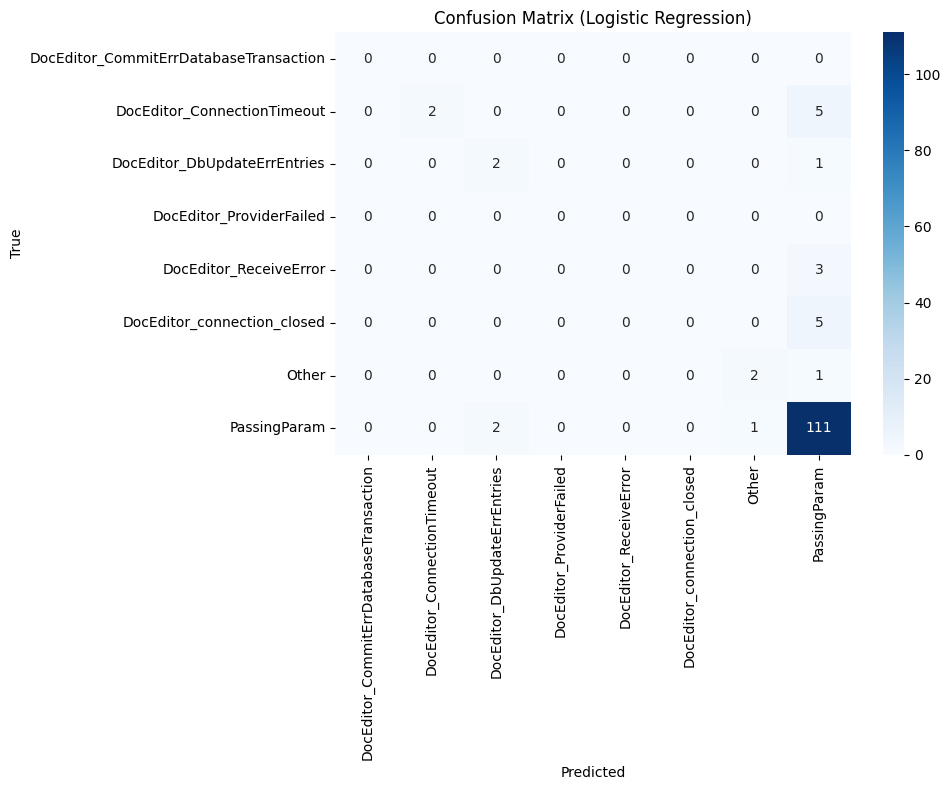


Overall Accuracy (Logistic Regression): 86.67%


In [112]:
# Tukar label angka kepada nama asal
y_test_series_LG = pd.Series(y_test, name='CATEGORY_ERROR_TRUE')
y_pred_series_LG = pd.Series(y_pred_logreg, name='CATEGORY_ERROR_PRED') #model Logistic Regression

y_test_labels_LG = le.inverse_transform(y_test_series_LG)
y_pred_labels_LG = le.inverse_transform(y_pred_series_LG)

# 1. Classification report
report_LG = classification_report(y_test_labels_LG, y_pred_labels_LG, output_dict=True)
report_df_LG = pd.DataFrame(report_LG).transpose()
print("Classification Report(Logistic Regression):")
print(report_df_LG)

# 2. Confusion Matrix
conf_matrix_LG = confusion_matrix(y_test_labels_LG, y_pred_labels_LG, labels=le.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_LG, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.tight_layout()
plt.show()

# 3. Accuracy
accuracy_LG = accuracy_score(y_test_labels_LG, y_pred_labels_LG)
print(f"\nOverall Accuracy (Logistic Regression): {accuracy_LG:.2%}")

# SVC (RBF)
Support Vector Classification used Radial Basis Function

In [113]:
from sklearn.svm import SVC
SVC_multiclass = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')
SVC_multiclass.fit(X_train, y_train)
y_pred_SVC = SVC_multiclass.predict(X_test)

In [114]:
SVC_y_pred = SVC_multiclass.predict(X_test)

# Pastikan y_test adalah Series untuk gunakan .iloc
y_test_series = pd.Series(y_test, index=X_test.index)  # guna index yang sama

# Ambil 5 contoh dan gabungkan dengan ciri
results_SVC = pd.concat([y_test_series.iloc[:5], X_test.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_SVC.insert(1, 'CATEGORY_ERROR_PRED', SVC_y_pred[:5])

results_SVC

,0,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,7,7,4,1,2023,0,12,True,False,False,...,False,False,True,False,False,False,False,True,False,False
158,7,7,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
480,7,7,1,2,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
641,4,7,1,1,2024,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
275,7,7,2,1,2023,1,11,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [115]:
# Jadikan y_test kepada Series dengan nama betul
y_test_series_SVC = pd.Series(y_test, index=X_test.index, name='CATEGORY_ERROR_TRUE')

# Gabungkan hasil sebenar dan ciri
results_SVC = pd.concat([y_test_series_SVC.iloc[:5], X_test.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_SVC.insert(1, 'CATEGORY_ERROR_PRED', SVC_y_pred[:5])

# (Opsyenal) Tukar nombor kelas kepada nama asal
results_SVC['CATEGORY_ERROR_TRUE'] = le.inverse_transform(results_SVC['CATEGORY_ERROR_TRUE'])
results_SVC['CATEGORY_ERROR_PRED'] = le.inverse_transform(results_SVC['CATEGORY_ERROR_PRED'])

results_SVC

,CATEGORY_ERROR_TRUE,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,PassingParam,PassingParam,4,1,2023,0,12,True,False,False,...,False,False,True,False,False,False,False,True,False,False
158,PassingParam,PassingParam,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
480,PassingParam,PassingParam,1,2,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
641,DocEditor_ReceiveError,PassingParam,1,1,2024,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
275,PassingParam,PassingParam,2,1,2023,1,11,True,False,False,...,False,False,True,False,False,False,False,False,False,True


# Evaluate (SVC)

Classification Report(SVC):
                              precision    recall  f1-score     support
DocEditor_ConnectionTimeout    0.000000  0.000000  0.000000    7.000000
DocEditor_DbUpdateErrEntries   0.000000  0.000000  0.000000    3.000000
DocEditor_ReceiveError         0.000000  0.000000  0.000000    3.000000
DocEditor_connection_closed    0.000000  0.000000  0.000000    5.000000
Other                          0.000000  0.000000  0.000000    3.000000
PassingParam                   0.844444  1.000000  0.915663  114.000000
accuracy                       0.844444  0.844444  0.844444    0.844444
macro avg                      0.140741  0.166667  0.152610  135.000000
weighted avg                   0.713086  0.844444  0.773226  135.000000


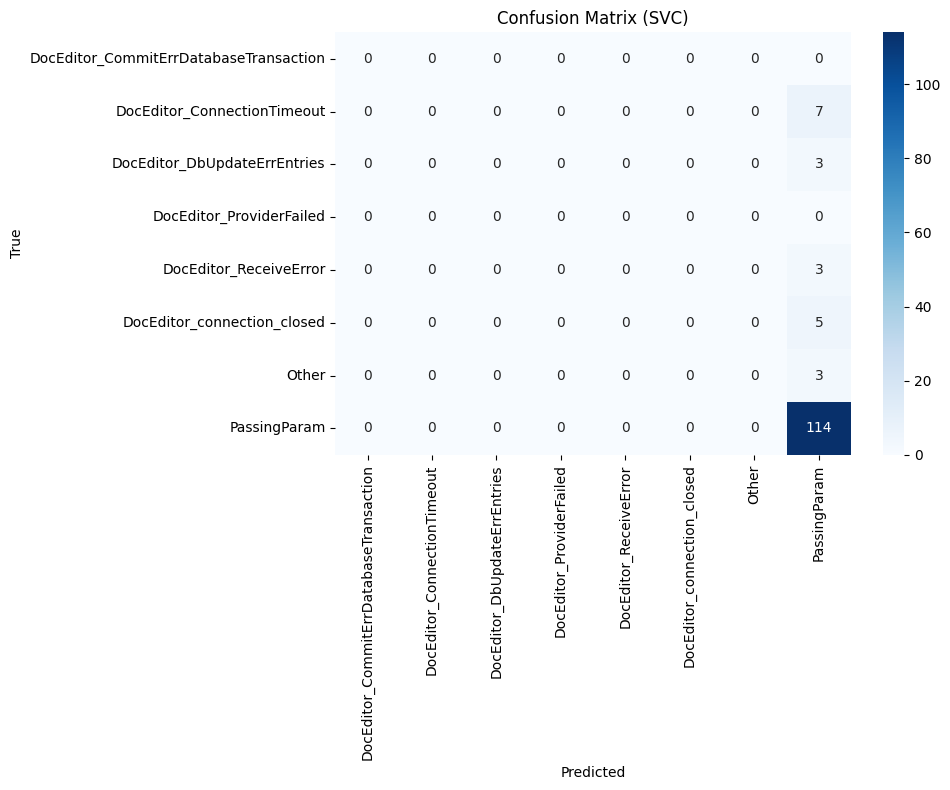


Overall Accuracy (SVC): 84.44%


In [116]:
# Tukar label angka kepada nama asal
y_test_series_SVC = pd.Series(y_test, name='CATEGORY_ERROR_TRUE')
y_pred_series_SVC = pd.Series(SVC_y_pred, name='CATEGORY_ERROR_PRED') #model SVC

y_test_labels_SVC = le.inverse_transform(y_test_series_SVC)
y_pred_labels_SVC = le.inverse_transform(y_pred_series_SVC)

# 1. Classification report
report_SVC = classification_report(y_test_labels_SVC, y_pred_labels_SVC, output_dict=True)
report_df_SVC = pd.DataFrame(report_SVC).transpose()
print("Classification Report(SVC):")
print(report_df_SVC)

# 2. Confusion Matrix
conf_matrix_SVC = confusion_matrix(y_test_labels_SVC, y_pred_labels_SVC, labels=le.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_SVC, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVC)')
plt.tight_layout()
plt.show()

# 3. Accuracy
accuracy_SVC = accuracy_score(y_test_labels_SVC, y_pred_labels_SVC)
print(f"\nOverall Accuracy (SVC): {accuracy_SVC:.2%}")

# 2) Applying with SMOTE

In [117]:
# Apply oversampling to the data

print('Before oversampling: ', Counter(y_train))

Before oversampling:  Counter({np.int64(7): 457, np.int64(1): 18, np.int64(4): 17, np.int64(6): 14, np.int64(2): 14, np.int64(5): 12, np.int64(0): 3, np.int64(3): 1})


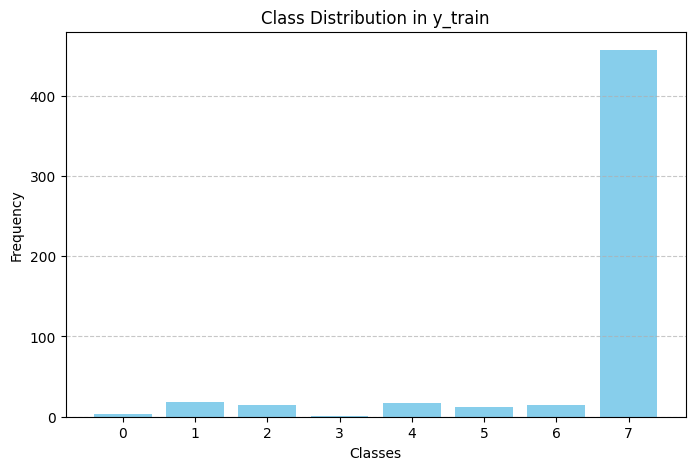

In [118]:

labels, values = zip(*Counter(y_train).items())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution in y_train')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [119]:
category_counts = df['CATEGORY_ERROR'].value_counts()
print("Category counts:\n", category_counts)

Category counts:
 CATEGORY_ERROR
PassingParam                              571
DocEditor_ConnectionTimeout                25
DocEditor_ReceiveError                     20
DocEditor_DbUpdateErrEntries               17
Other                                      17
DocEditor_connection_closed                17
DocEditor_CommitErrDatabaseTransaction      3
DocEditor_ProviderFailed                    1
Name: count, dtype: int64


In [120]:
rare_classes = category_counts[category_counts < 5]

In [121]:
df_filtered = df[~df['CATEGORY_ERROR'].isin(rare_classes.index)]
print("Filtered DataFrame shape:", df_filtered.shape)

Filtered DataFrame shape: (667, 10)


In [122]:
category_filter_counts = df_filtered['CATEGORY_ERROR'].value_counts()
print("Category counts after filtering:\n", category_filter_counts)


Category counts after filtering:
 CATEGORY_ERROR
PassingParam                    571
DocEditor_ConnectionTimeout      25
DocEditor_ReceiveError           20
DocEditor_DbUpdateErrEntries     17
Other                            17
DocEditor_connection_closed      17
Name: count, dtype: int64


In [123]:
X_filter = df_filtered[features]

In [124]:
features

['PAGE_NO',
 'TOTAL_ANNOTATION',
 'DEVICE_NAME',
 'BROWSER_VERSION',
 'BROWSER_NAME',
 'YEAR',
 'TIME_BIN',
 'IS_WEEKEND',
 'MONTH']

In [125]:
X_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 0 to 670
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PAGE_NO           667 non-null    int64 
 1   TOTAL_ANNOTATION  667 non-null    int64 
 2   DEVICE_NAME       667 non-null    string
 3   BROWSER_VERSION   667 non-null    object
 4   BROWSER_NAME      667 non-null    object
 5   YEAR              667 non-null    int32 
 6   TIME_BIN          667 non-null    object
 7   IS_WEEKEND        667 non-null    int64 
 8   MONTH             667 non-null    int32 
dtypes: int32(2), int64(3), object(3), string(1)
memory usage: 46.9+ KB


In [126]:
#(one-hot encoding):
X_encoded_filter = pd.get_dummies(X_filter)

In [127]:
#Tukar label CATEGORY_ERROR kepada angka:
le = LabelEncoder()
y_filter = le.fit_transform(df_filtered['CATEGORY_ERROR'])

In [128]:
X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(X_encoded_filter, y_filter, test_size=0.2, random_state=42)

X_train_filter.shape, X_test_filter.shape, y_train_filter.shape, y_test_filter.shape

((533, 40), (134, 40), (533,), (134,))

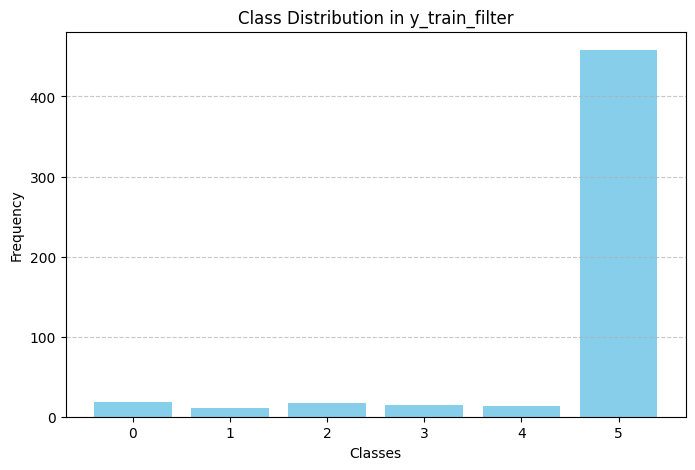

In [129]:
labels, values = zip(*Counter(y_train_filter).items())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution in y_train_filter')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [130]:
# Define oversampling strategy.
#can SMOTE only if the number data minority is more than 5, by default number 5 is used.

from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

# Fit and apply the transform.

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_filter, y_train_filter)
X_train_SMOTE = pd.DataFrame(X_train_SMOTE,
                             columns = X_train_filter.columns)

print('After oversampling: ', Counter(y_train_SMOTE))

After oversampling:  Counter({np.int64(5): 458, np.int64(2): 458, np.int64(0): 458, np.int64(3): 458, np.int64(1): 458, np.int64(4): 458})


In [131]:
#Check the distribution of the test data

# Test data should not be oversampled.

print('Test-data features: ', X_test_filter.shape)
print('Test-data target:   ', y_test_filter.shape)

Test-data features:  (134, 40)
Test-data target:    (134,)


In [132]:
Counter(y_test_filter)

Counter({np.int64(5): 113,
         np.int64(1): 6,
         np.int64(0): 6,
         np.int64(4): 4,
         np.int64(2): 3,
         np.int64(3): 2})

In [133]:
# Normalize the data

norm = MinMaxScaler().fit(X_train_SMOTE)

In [134]:
X_train_norm = norm.transform(X_train_SMOTE)

print('Minimum: ', np.min(X_train_norm))
print('Maximum: ', np.max(X_train_norm))

Minimum:  0.0
Maximum:  1.0000000000000002


# 3) Traning Model after balanced the dataset

# RandomForestClassifier

In [135]:
model_RFS_smote = RandomForestClassifier()
model_RFS_smote.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [136]:
RFS_smote_y_pred = model_RFS_smote.predict(X_test_filter)

In [137]:
# Jadikan y_test kepada Series dengan nama betul
y_test_series = pd.Series(y_test_filter, index=X_test_filter.index, name='CATEGORY_ERROR_TRUE')

# Gabungkan hasil sebenar dan ciri
results_RFClassifier_SMOTE = pd.concat([y_test_series.iloc[:5], X_test_filter.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_RFClassifier_SMOTE.insert(1, 'CATEGORY_ERROR_PRED', RFS_smote_y_pred[:5])

# (Opsyenal) Tukar nombor kelas kepada nama asal
results_RFClassifier_SMOTE['CATEGORY_ERROR_TRUE'] = le.inverse_transform(results_RFClassifier_SMOTE['CATEGORY_ERROR_TRUE'])
results_RFClassifier_SMOTE['CATEGORY_ERROR_PRED'] = le.inverse_transform(results_RFClassifier_SMOTE['CATEGORY_ERROR_PRED'])

results_RFClassifier_SMOTE

,CATEGORY_ERROR_TRUE,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
664,DocEditor_DbUpdateErrEntries,DocEditor_ReceiveError,3,7,2024,0,12,True,False,False,...,False,False,True,False,False,False,False,False,True,False
158,PassingParam,PassingParam,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
638,DocEditor_DbUpdateErrEntries,DocEditor_DbUpdateErrEntries,3,9,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
235,PassingParam,PassingParam,2,1,2023,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
639,PassingParam,PassingParam,1,5,2024,0,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False


In [138]:
accuracy = accuracy_score(y_test_filter, RFS_smote_y_pred)
print(f"\nOverall Accuracy: {accuracy:.2%}")


Overall Accuracy: 91.79%


# Logistic Regression

In [139]:
logreg_SMOTE_multiclass = LogisticRegression(multi_class='multinomial', max_iter=1000)
logreg_SMOTE_multiclass.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_logreg_SMOTE = logreg_SMOTE_multiclass.predict(X_test_filter)


In [140]:
# Jadikan y_test kepada Series dengan nama betul
#y_test_series = pd.Series(y_test_filter, index=X_test_filter.index, name='CATEGORY_ERROR_TRUE')

# Gabungkan hasil sebenar dan ciri
results_logreg_SMOTE = pd.concat([y_test_series.iloc[:5], X_test_filter.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_logreg_SMOTE.insert(1, 'CATEGORY_ERROR_PRED', y_pred_logreg_SMOTE[:5])

# (Opsyenal) Tukar nombor kelas kepada nama asal
results_logreg_SMOTE['CATEGORY_ERROR_TRUE'] = le.inverse_transform(results_logreg_SMOTE['CATEGORY_ERROR_TRUE'])
results_logreg_SMOTE['CATEGORY_ERROR_PRED'] = le.inverse_transform(results_logreg_SMOTE['CATEGORY_ERROR_PRED'])

results_logreg_SMOTE

,CATEGORY_ERROR_TRUE,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
664,DocEditor_DbUpdateErrEntries,DocEditor_connection_closed,3,7,2024,0,12,True,False,False,...,False,False,True,False,False,False,False,False,True,False
158,PassingParam,PassingParam,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
638,DocEditor_DbUpdateErrEntries,DocEditor_DbUpdateErrEntries,3,9,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
235,PassingParam,PassingParam,2,1,2023,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
639,PassingParam,PassingParam,1,5,2024,0,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False


In [141]:
accuracy = accuracy_score(y_test_filter, y_pred_logreg_SMOTE)
print(f"\nOverall Accuracy: {accuracy:.2%}")


Overall Accuracy: 81.34%


# SVC (RBF)
Support Vector Classification used Radial Basis Function

In [142]:
SVC_SMOTE_multiclass = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')
SVC_SMOTE_multiclass.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_SVC_SMOTE = SVC_SMOTE_multiclass.predict(X_test_filter)


In [143]:
# Gabungkan hasil sebenar dan ciri
results_SVC_SMOTE = pd.concat([y_test_series.iloc[:5], X_test_filter.iloc[:5]], axis=1)

# Tambah kolum ramalan
results_SVC_SMOTE.insert(1, 'CATEGORY_ERROR_PRED', y_pred_SVC_SMOTE[:5])

# (Opsyenal) Tukar nombor kelas kepada nama asal
results_SVC_SMOTE['CATEGORY_ERROR_TRUE'] = le.inverse_transform(results_SVC_SMOTE['CATEGORY_ERROR_TRUE'])
results_SVC_SMOTE['CATEGORY_ERROR_PRED'] = le.inverse_transform(results_SVC_SMOTE['CATEGORY_ERROR_PRED'])

results_SVC_SMOTE

,CATEGORY_ERROR_TRUE,CATEGORY_ERROR_PRED,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Desktop,DEVICE_NAME_Mobile,BROWSER_VERSION_109.0.0.0,...,BROWSER_VERSION_604.1,BROWSER_VERSION_605.1.15,BROWSER_NAME_Chrome,BROWSER_NAME_Edge,BROWSER_NAME_Firefox,BROWSER_NAME_Safari,TIME_BIN_Afternoon,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
664,DocEditor_DbUpdateErrEntries,DocEditor_ReceiveError,3,7,2024,0,12,True,False,False,...,False,False,True,False,False,False,False,False,True,False
158,PassingParam,DocEditor_ReceiveError,2,1,2023,0,11,True,False,False,...,False,False,False,False,True,False,False,False,True,False
638,DocEditor_DbUpdateErrEntries,DocEditor_DbUpdateErrEntries,3,9,2025,0,3,True,False,False,...,False,False,True,False,False,False,False,False,True,False
235,PassingParam,DocEditor_ReceiveError,2,1,2023,0,11,True,False,True,...,False,False,True,False,False,False,False,False,True,False
639,PassingParam,DocEditor_DbUpdateErrEntries,1,5,2024,0,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False


In [144]:
accuracy = accuracy_score(y_test_filter, y_pred_SVC_SMOTE)
print(f"\nOverall Accuracy: {accuracy:.2%}")



Overall Accuracy: 15.67%


# 4) Compare evaluation metrics for each model

In [145]:
models_P2 = ['Random Forest', 'Logistic Regression', 'SVC (RBF)']
metrics_P2 = ['Accuracy', 'Precision', 'Recall', 'F1']
pred_list_p2 = ['RFS_smote_y_pred', 'y_pred_logreg_SMOTE', 'y_pred_SVC_SMOTE']

# Baseline algorithm.
dummy_p2 = DummyClassifier(strategy='stratified')
dummy_p2.fit(X_train_SMOTE, y_train_SMOTE)
dummy_y_pred = dummy_p2.predict(X_test_filter)

# Store model scores
scores_p2 = np.empty((0, 4))

for pred in pred_list_p2:
    y_pred = globals()[pred]
    scores_p2 = np.append(scores_p2,
                          np.array([[accuracy_score(y_test_filter, y_pred),
                                     precision_score(y_test_filter, y_pred, average='weighted'),
                                     recall_score(y_test_filter, y_pred, average='weighted'),
                                     f1_score(y_test_filter, y_pred, average='weighted')]]),
                          axis=0)

# Round and format results
scores_p2 = np.around(scores_p2, 4)
scoring_df_p2 = pd.DataFrame(scores_p2, index=models_P2, columns=metrics_P2)

# Optional: Add dummy model comparison
dummy_scores = np.array([[accuracy_score(y_test_filter, dummy_y_pred),
                          precision_score(y_test_filter, dummy_y_pred, average='weighted'),
                          recall_score(y_test_filter, dummy_y_pred, average='weighted'),
                          f1_score(y_test_filter, dummy_y_pred, average='weighted')]])
dummy_scores = np.around(dummy_scores, 4)
scoring_df_p2.loc['Dummy (Stratified)'] = dummy_scores[0]

# Sort by F1 score
scoring_df_p2 = scoring_df_p2.sort_values(by='F1', ascending=False)

print(scoring_df_p2)

                     Accuracy  Precision  Recall      F1
Random Forest          0.9179     0.8992  0.9179  0.8990
Logistic Regression    0.8134     0.8813  0.8134  0.8374
Dummy (Stratified)     0.2612     0.7747  0.2612  0.3540
SVC (RBF)              0.1567     0.8716  0.1567  0.2022


# 5) Plot Confusion Matrix 

In [146]:
# Generate a confusion matrix
confusion_matrix(y_test_filter, RFS_smote_y_pred)

array([[  4,   0,   0,   0,   1,   1],
       [  0,   2,   1,   0,   2,   1],
       [  1,   0,   0,   0,   0,   2],
       [  1,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   4,   0],
       [  0,   0,   0,   0,   0, 113]])

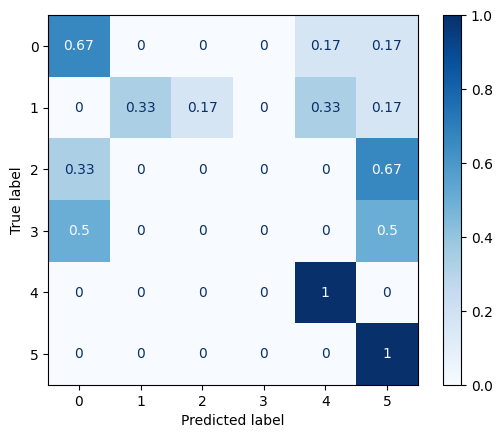

In [147]:
ConfusionMatrixDisplay.from_estimator(model_RFS_smote, 
                                      X_test_filter, 
                                      y_test_filter,
                                      cmap = plt.cm.Blues,
                                      normalize = 'true')

plt.show();

In [148]:
# Generate a confusion matrix
confusion_matrix(y_test_filter, y_pred_logreg_SMOTE)

array([[ 5,  1,  0,  0,  0,  0],
       [ 1,  2,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  4,  0],
       [ 6,  0,  7,  2,  1, 97]])

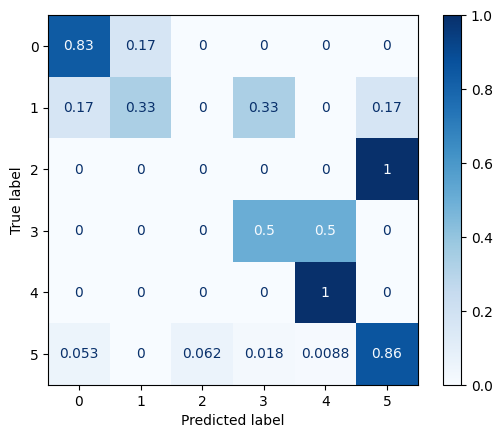

In [149]:
ConfusionMatrixDisplay.from_estimator(logreg_SMOTE_multiclass, 
                                      X_test_filter, 
                                      y_test_filter,
                                      cmap = plt.cm.Blues,
                                      normalize = 'true')

plt.show();

# 6) Plot ROC curve 

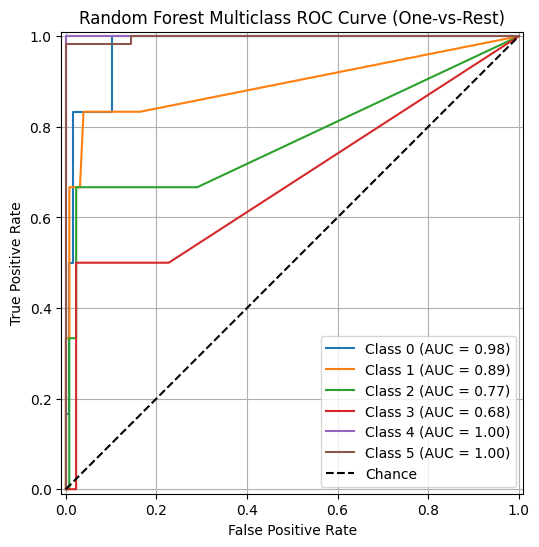

In [150]:

# Plot ROC for each class
from sklearn.preprocessing import label_binarize

# Binarize y_test for ROC (one-vs-rest)
classes = np.unique(y_test_filter)
y_test_bin = label_binarize(y_test_filter, classes=classes)

# Plot ROC for each class
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(classes)):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],                       # true binary labels for class i
        model_RFS_smote.predict_proba(X_test_filter)[:, i],      # predicted probs for class i
        name=f"Class {classes[i]}",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Multiclass ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()



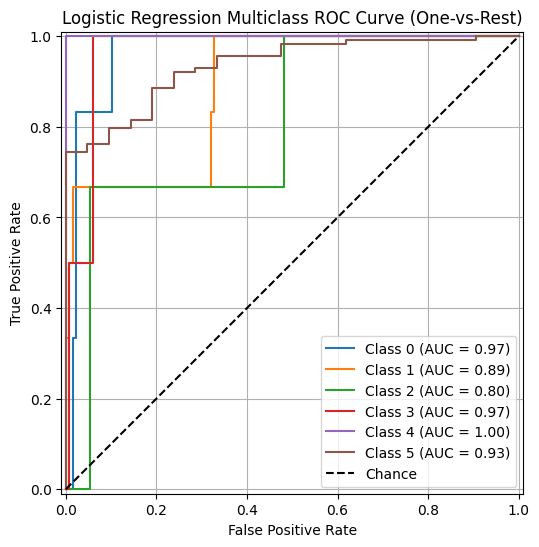

In [151]:
# Binarize y_test for ROC (one-vs-rest)
classes = np.unique(y_test_filter)
y_test_bin = label_binarize(y_test_filter, classes=classes)

# Plot ROC for each class
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(classes)):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],                       # true binary labels for class i
        logreg_SMOTE_multiclass.predict_proba(X_test_filter)[:, i],      # predicted probs for class i
        name=f"Class {classes[i]}",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression Multiclass ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()

# 7) Plot precision–recall curve 

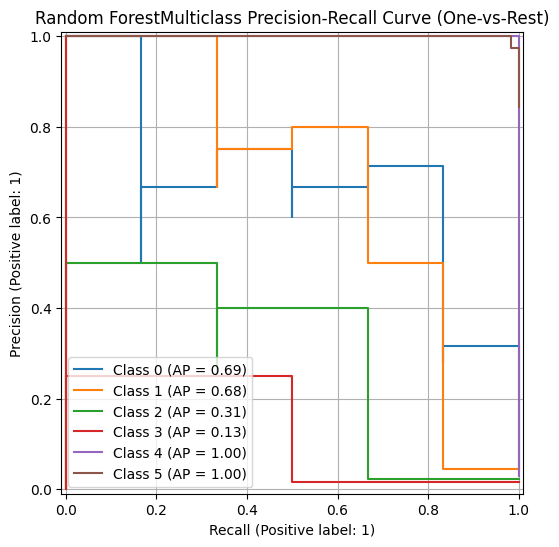

In [152]:
classes = np.unique(y_test_filter)
y_test_bin = label_binarize(y_test_filter, classes=classes)

# 4. Plot Precision-Recall untuk setiap kelas
fig, ax = plt.subplots(figsize=(8, 6))
y_score = model_RFS_smote.predict_proba(X_test_filter)  # list of shape (n_samples, n_classes)

for i in range(len(classes)):
    PrecisionRecallDisplay.from_predictions(
        y_test_bin[:, i],          # binary true labels for class i
        y_score[:, i],             # predicted probability for class i
        name=f"Class {classes[i]}",
        ax=ax
    )

plt.title("Random ForestMulticlass Precision-Recall Curve (One-vs-Rest)")
plt.grid()
plt.show()

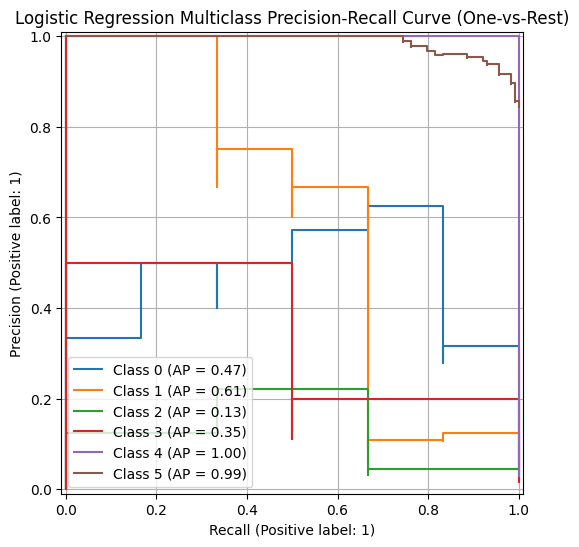

In [153]:
# 4. Plot Precision-Recall untuk setiap kelas
fig, ax = plt.subplots(figsize=(8, 6))
y_score = logreg_SMOTE_multiclass.predict_proba(X_test_filter)  # list of shape (n_samples, n_classes)

for i in range(len(classes)):
    PrecisionRecallDisplay.from_predictions(
        y_test_bin[:, i],          # binary true labels for class i
        y_score[:, i],             # predicted probability for class i
        name=f"Class {classes[i]}",
        ax=ax
    )

plt.title("Logistic Regression Multiclass Precision-Recall Curve (One-vs-Rest)")
plt.grid()
plt.show()

# 8) Plot Feature-Importance 

In [158]:
# Generate a feature-importance plot
def feature_importance_plot(model, X_train, n):
    """Plots feature importance. Only works for ensemble learning."""
    plt.figure(figsize = (8, 5))
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.gca().invert_yaxis()  # Largest at top
    plt.title(f'Top {n} Features')
    plt.show()

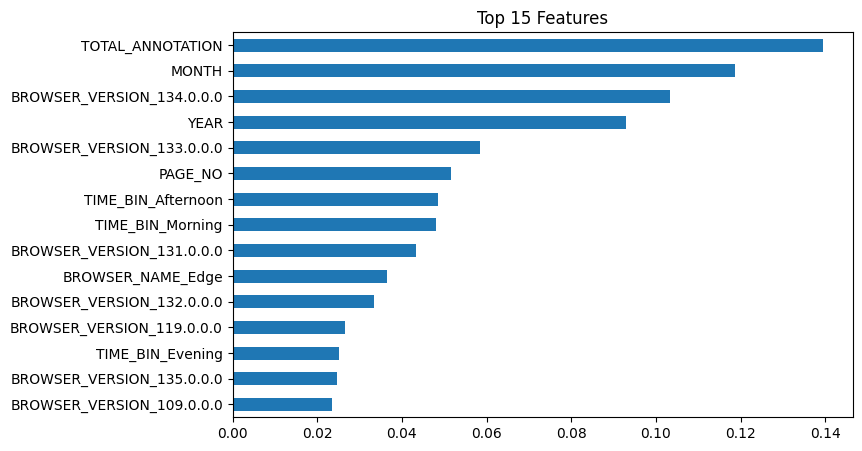

In [159]:
feature_importance_plot(model_RFS_smote, X_train_SMOTE, 15)

# 9) SHAP (Shapley Additive Explanations)

In [160]:
pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 18.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ------ --------------------------------- 4.7/30.3 MB 22.0 MB/s eta 0:00:02
   ------------ --------------------------- 9.7/30.3 MB 22.4 MB/s eta 0:00:01
   -------------------- ------------------- 15.7/30.3 MB 24.7 MB/s eta 0:00:01
   ---------------------------- ----------- 21.5/30.3 MB 25.6 MB/s eta 0:00:01
   ------------------------------------ --- 27.5/30.3 MB 26.0 MB/s eta 0:00:01
   ---------------------------------------  30.1/30.3 MB 26.2 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 21.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [162]:
print(f"X_test_filter shape: {X_test_filter.shape}")
print(f"shap_values type: {type(shap_values)}")
print(f"len(shap_values): {len(shap_values)}")
print(f"shap_values[0] shape: {shap_values[0].shape}")

X_test_filter shape: (134, 40)
shap_values type: <class 'numpy.ndarray'>
len(shap_values): 134
shap_values[0] shape: (40, 6)


Original shape: (134, 40, 6)
SHAP summary for class 0


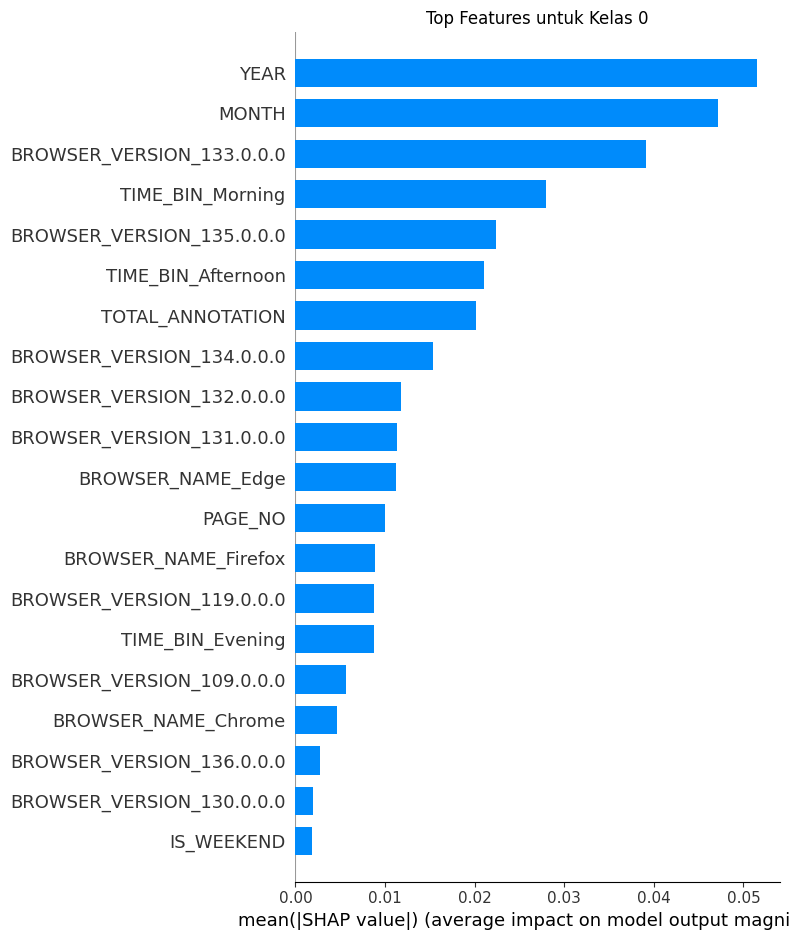

SHAP summary for class 1


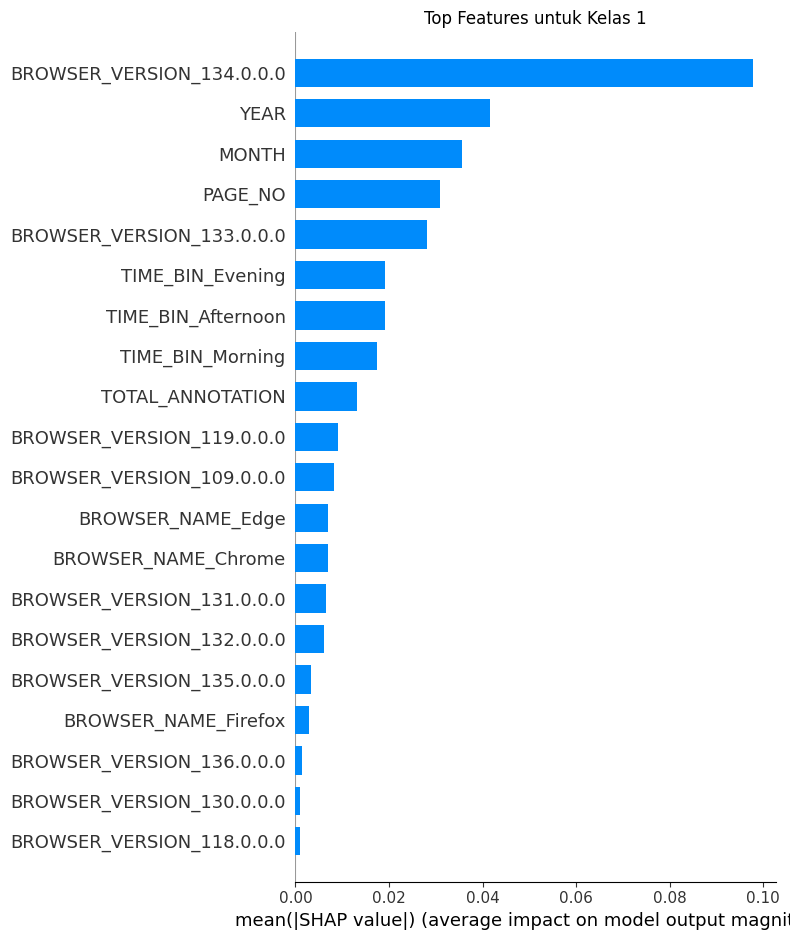

SHAP summary for class 2


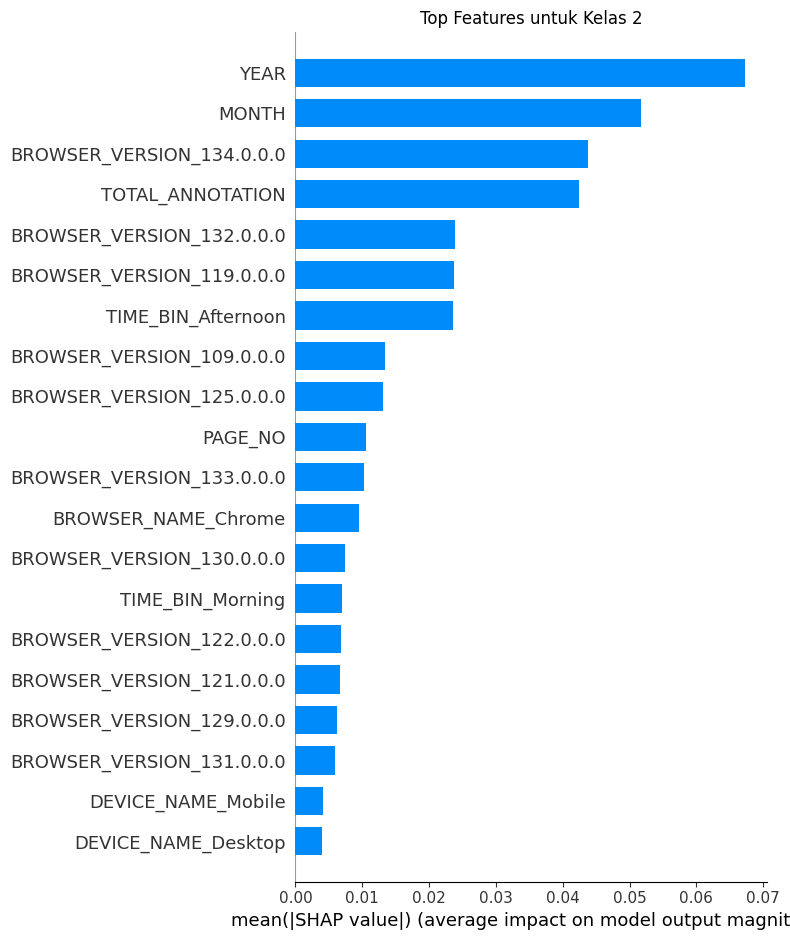

SHAP summary for class 3


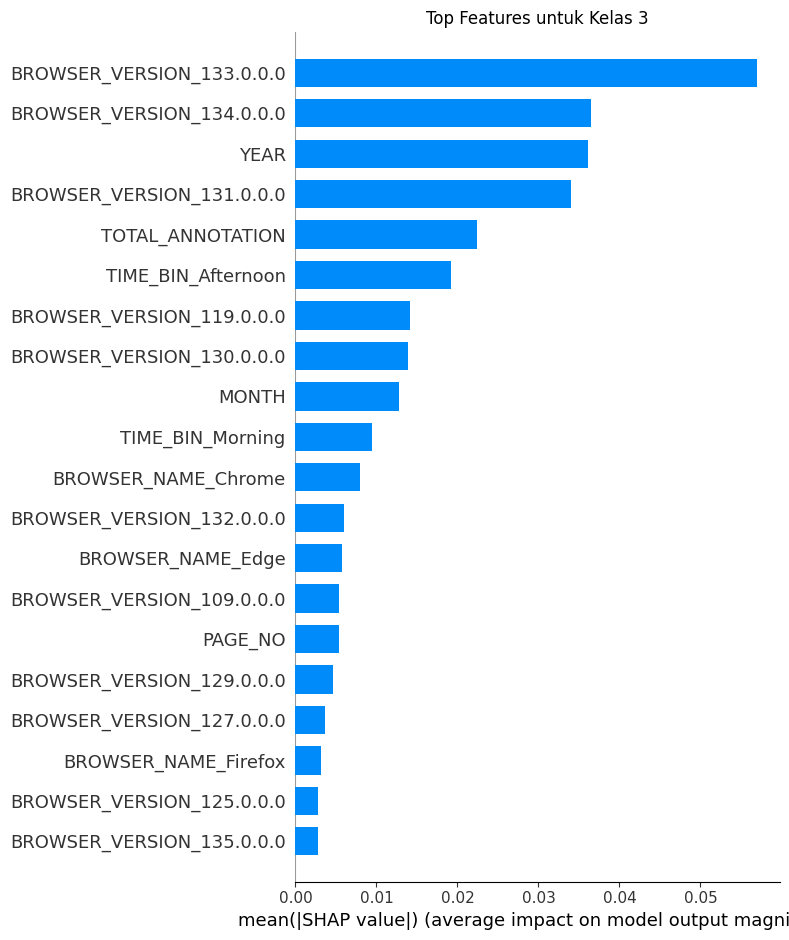

SHAP summary for class 4


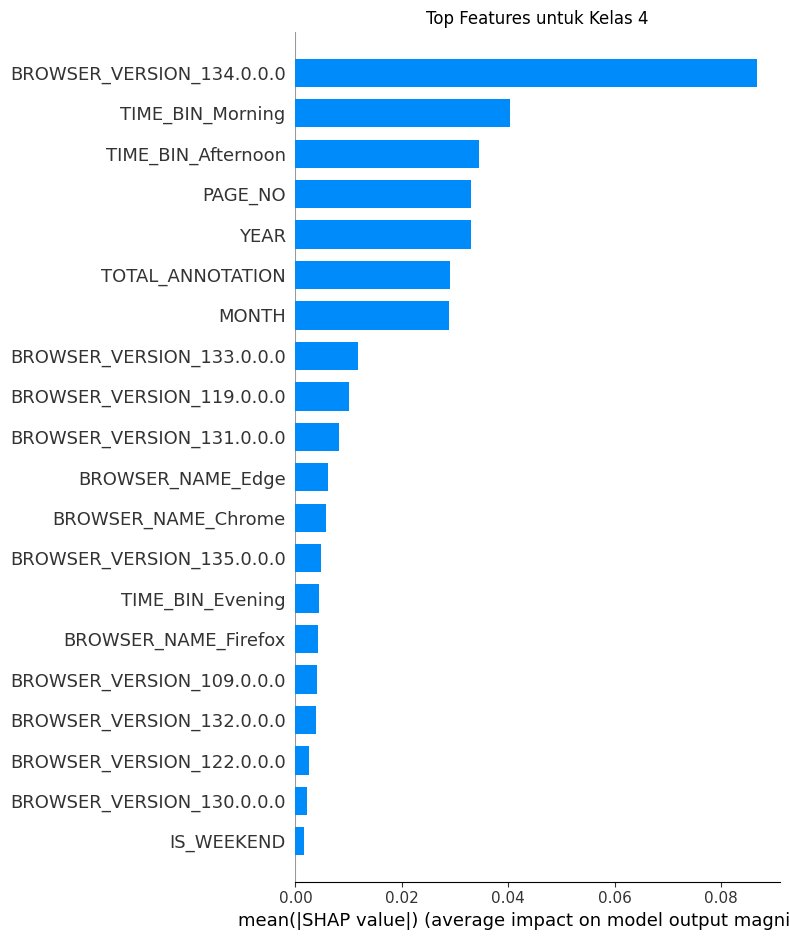

SHAP summary for class 5


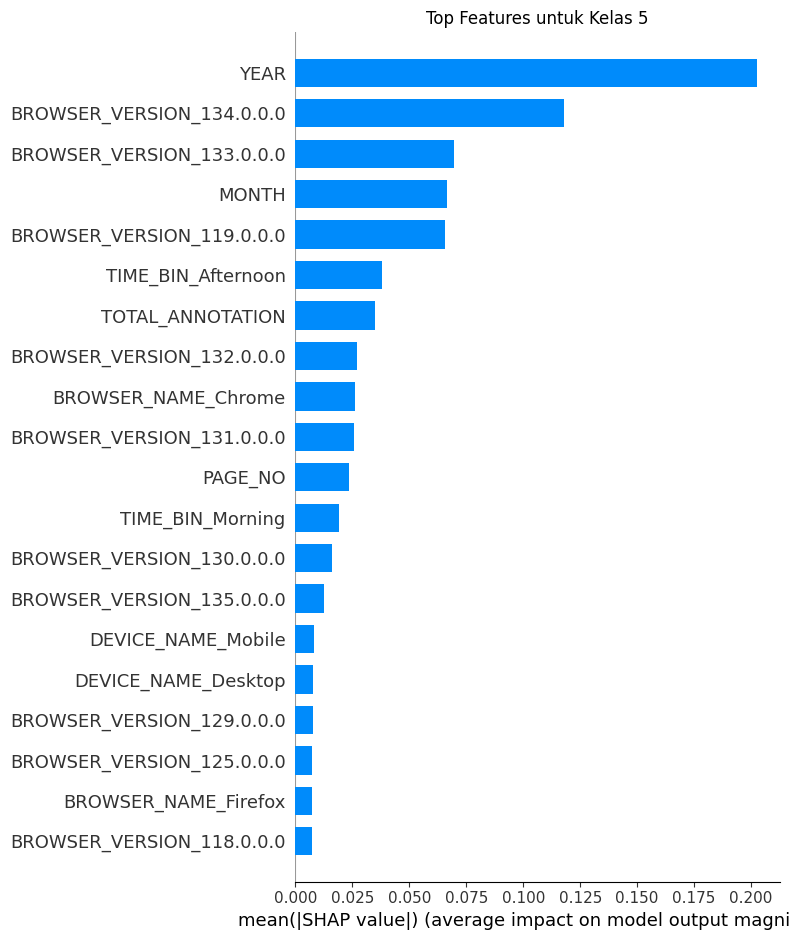

In [163]:
import shap
# SHAP (SHapley Additive exPlanations) untuk interpretasi model

# Pastikan X_test_filter adalah DataFrame
if not isinstance(X_test_filter, pd.DataFrame):
    X_test_filter = pd.DataFrame(
        X_test_filter,
        columns=[f"Feature_{i}" for i in range(X_test_filter.shape[1])]
    )

# Buat explainer dan kira shap_values
explainer = shap.TreeExplainer(model_RFS_smote)
shap_values = explainer.shap_values(X_test_filter)

print("Original shape:", np.array(shap_values).shape)  # misal (134, 40, 6)

# Betulkan dimensi
sv = np.array(shap_values).transpose(2, 0, 1)  # jadi (6, 134, 40)

# Plot untuk setiap kelas
for i in range(sv.shape[0]):
    print(f"SHAP summary for class {i}")
    shap.summary_plot(
        sv[i],
        X_test_filter,
        plot_type="bar",
        show=False
    )
    plt.title(f"Top Features untuk Kelas {i}")
    plt.tight_layout()
    plt.show()

# 10)Plot learning curves

In [164]:
# Plot learning curves
def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    plt.figure(figsize = (5, 5))
    train_sizes, train_scores, test_scores = \
    learning_curve(model, X_train, y_train, cv = 5,
                   scoring = 'accuracy', n_jobs = -1,
                   shuffle = True,
                   train_sizes = np.linspace(0.01, 1.0, 5))
        
    # Means of training and test set scores.
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Draw lines.
    plt.plot(train_sizes, train_mean, '--',
             color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean,
             color = '#111111', label = 'Cross-validation score')

    # Create plot.
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
    plt.tight_layout()

    plt.show()

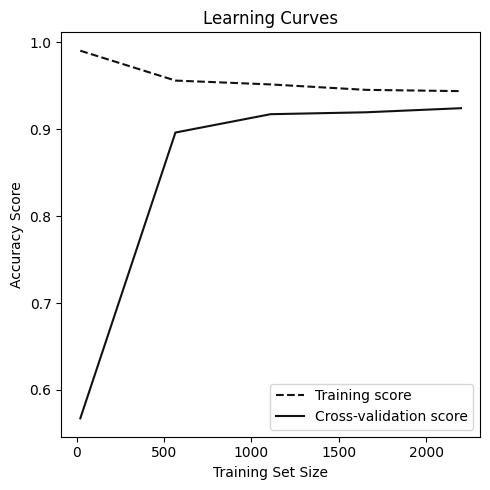

In [165]:
plot_learning_curves(model_RFS_smote, X_train_SMOTE, y_train_SMOTE)

In [166]:
#Save the best model
pickle.dump(model_RFS_smote, open('Multiclass_RandomForest.pickle', 'wb'))

# 11) Conclusion

1) To Predict Clasification more than 2 value from feature CATEGORY_ERROR.
2) The Distribution of CATEGORY_ERROR have the most parameter issues compare to others. The data showing that have imbalance data. 
3) Train and Test data without applying SMOTE.
4) Training data in 80% and Test is 20%
5) Model involved Logistic Regression,Random Forest and SVC (RBF) [Support Vector Classification used Radial Basis Function]
6) Evaluate all Model without SMOTE
7) Evaluate SVM Model by Accuracy Logistic Regression(86.67%),Random Forest(82.96%) and SVC (RBF) (84.44%), the Logistic Regression is highest compare the others but without SMOTE.
8) The SMOTE can apply if the total value for label is more than 5 by default, the totasl is below than 5  will be romove in order to applying the SMOTE method.
9) Train and Test data with applying SMOTE.
10) Same model involved Logistic Regression,Random Forest and SVC (RBF)
11) Evaluate SVM Model by Accuracy Logistic Regression(81.34%),Random Forest(91.79%) and SVC (RBF) (15.67%), the Random Forest is highest compare the others with SMOTE method.
15) Compare Evaluation metrics for each model Dummy Regression, Logistic Regression, Random Forest and SVC (RBF)
16) Used Dummy model (not using in real production) but used as benchmark.
17) The best model show the Random Forest is better and following Logistic Regression. Below than Dummy Class, the model is not good enough.
18) The Model with Precision,Recall F1 score with near to 1 showing the model is very good in predict classification.
19) The Plot Features Important shows 15 top influence the target feature for all multiple class. The highest score is Total Annotation features.
20) The Plot Features Important also applying SHAP (Shapley Additive Explanations) to check for each class.
20) The Plot AUC show exactly 1 score is the perfect score for class 4 and 5, need to check whether the model is overfitting or data sample is too few for these class. the AUC is for Random Forest. the class 0 and 1 is the best so far. for the class 2 still good. But for class 3 still average but it can be improved.
21) The Plot Precision and Recall show exactly 1 score is the perfect score for class 4 and 5, need to check whether the model is overfitting or data sample is too few for these class. For class 2 and 3 is very weak. These class failed predicted and precison and recall is very low.
22) The plot for learning curve show the training score seems decreasing but still good over than 90% meanwhile cross-validation score increasing with more training set. Means that the model for Random Forest is good becauseit can learn and generalize the new dataset very well. this showing the model is stable and overfitting is not significant
24) The gap become closed between training score and cross validation score, it showing that model will is good to handle with new data.
26) the gap is very closed between training score and cross validation score, in conclusion the model is good.